# Latihan Mengolah Data, Exploratory Data Analysis
## EDA | Online Shopping Dataset
References: <a href="https://www.kaggle.com/code/ahmedabbas757/online-shopping-sales-eda">clickme</a>
- <b>Dataset:</b> Online Shopping
- <b>Insight yang bisa didapat:</b> Analisis pola penjualan, kategori produk yang paling laris, tren bulanan, serta perilaku pelanggan berdasarkan waktu.
- <b>Dataset sumber:</b> <a href="https://www.kaggle.com/datasets/jacksondivakarr/online-shopping-dataset">Kaggle</a>

## Pertanyaan

- **Penjualan dan Pendapatan:**
  - Apa saja kategori produk yang paling laku?
  - Produk mana yang menghasilkan pendapatan paling banyak?
  - Apakah ada musim atau waktu tertentu dalam setahun ketika penjualan mencapai puncaknya?
  - Bagaimana penjualan daring dan luring dibandingkan dalam hal pendapatan?

- **Perilaku Pelanggan:**
  - Apa saja produk yang paling populer di antara berbagai kelompok demografi pelanggan dan jenis kelamin?
  - Bagaimana pengeluaran pelanggan bervariasi di berbagai lokasi?
  - Apakah ada tren dalam penggunaan kupon atau diskon di antara pelanggan?

- **Keberlanjutan dan Tren:**
  - Apakah ada permintaan untuk produk yang lebih berkelanjutan atau organik di antara pelanggan?
  - Tren makanan atau produk baru apa yang harus dipertimbangkan untuk tersedia di supermarket?


## Step 0: Import dan Reading Data
<p>Mengimport library yang akan digunakan dan menghubungkannya ke dataset</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

# Mengatur style untuk visualisasi
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [2]:
# Read dataset
df = pd.read_csv('dataset/Online_Shopping.csv')

## Step 1: Data Understanding
- Dataframe __shape__ : Untuk melihat jumlah baris dan kolom
- __head__ and __tail__ : Head untuk menampilkan 5 baris pertama, tail untuk menampilkan 5 baris terakhir
- __dtypes__ : Untuk menampilkan tipe data dari setiap kolom
- __describe__ : Untuk menampilkan data numerik

**Melihat jumlah baris dan kolom**

In [3]:
df.shape

(52955, 21)

**Menampilkan 5 baris awal**

In [4]:
df.head()

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  GST      Date  \
0       1.0     153.71               6.5          Used  0.1  1/1/2019   
1       1.0     153.71               6.5          Used  0.1  1/1/2019   
2       2.0     122.77               6.5      Not Used  0.1  1/1/2019   
3       1.0      81.50               6.5       Clicked  0.1  1/1/2019   
4       1.0     153.71               6.5       Clicked  0.1  1/1/2019   

   Offline_Spend  Online_Spend  Month Coupon_Code  Discount_pct  
0         4500.0        2424.5      1      ELEC10          10.0  
1         4500.0        2424.5      1      ELEC10          10.0  
2         4500.0        2424.5      1      ELEC10          10.0  
3         4500.0        2424.5      1      ELEC10          10.0  
4         4500.0        2424.5      1      ELEC10          10.0

**Melihat semua daftar kolom yang ada**

In [5]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

**Melihat tipe data dari setiap kolom**

In [6]:
df.dtypes

Unnamed: 0               int64
CustomerID             float64
Gender                  object
Location                object
Tenure_Months          float64
Transaction_ID         float64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity               float64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
GST                    float64
Date                    object
Offline_Spend          float64
Online_Spend           float64
Month                    int64
Coupon_Code             object
Discount_pct           float64
dtype: object

**Melihat rincian data numerik**

In [7]:
df.describe()

Unnamed: 0   CustomerID  Tenure_Months  Transaction_ID      Quantity  \
count  52955.000000  52924.00000   52924.000000    52924.000000  52924.000000   
mean   26477.000000  15346.70981      26.127995    32409.825675      4.497638   
std    15286.936089   1766.55602      13.478285     8648.668977     20.104711   
min        0.000000  12346.00000       2.000000    16679.000000      1.000000   
25%    13238.500000  13869.00000      15.000000    25384.000000      1.000000   
50%    26477.000000  15311.00000      27.000000    32625.500000      1.000000   
75%    39715.500000  16996.25000      37.000000    39126.250000      2.000000   
max    52954.000000  18283.00000      50.000000    48497.000000    900.000000   

          Avg_Price  Delivery_Charges           GST  Offline_Spend  \
count  52924.000000      52924.000000  52924.000000   52924.000000   
mean      52.237646         10.517630      0.137462    2830.914141   
std       64.006882         19.475613      0.045825     936.154247   
min        0.390000          0.000000      0.050000     500.000000   
25%        5.700000          6.000000      0.100000    2500.000000   
50%       16.990000          6.000000      0.180000    3000.000000   
75%      102.130000          6.500000      0.180000    3500.000000   
max      355.740000        521.360000      0.180000    5000.000000   

       Online_Spend         Month  Discount_pct  
count  52924.000000  52955.000000  52555.000000  
mean    1893.109119      6.652800     19.953382  
std      807.014092      3.333664      8.127108  
min      320.250000      1.000000     10.000000  
25%     1252.630000      4.000000     10.000000  
50%     1837.870000      7.000000     20.000000  
75%     2425.350000      9.000000     30.000000  
max     4556.930000     12.000000     30.000000

## Step 2: Data Preperation
Mempersiapkan dan membersihkan data sebelum masuk ke tahap analisis:
- Menghapus kolom dan baris yang tidak relevan
- Mengidentifikasi kolom yang duplikat
- Mengganti Nama Kolom
- Pembuatan Fitur

In [8]:
df.head(10)

Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   
5           5     17850.0      M  Chicago           12.0         16701.0   
6           6     17850.0      M  Chicago           12.0         16702.0   
7           7     17850.0      M  Chicago           12.0         16703.0   
8           8     17850.0      M  Chicago           12.0         16704.0   
9           9     17850.0      M  Chicago           12.0         16710.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   
5       2019-01-01  GGOENEBJ079499   
6       2019-01-01  GGOENEBJ079499   
7       2019-01-01  GGOENEBQ079099   
8       2019-01-01  GGOENEBJ079499   
9       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA   
3    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
4  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
5  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
6  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
7    Nest Protect Smoke + CO White Battery Alarm-USA         Nest-USA   
8  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
9  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  GST      Date  \
0       1.0     153.71              6.50          Used  0.1  1/1/2019   
1       1.0     153.71              6.50          Used  0.1  1/1/2019   
2       2.0     122.77              6.50      Not Used  0.1  1/1/2019   
3       1.0      81.50              6.50       Clicked  0.1  1/1/2019   
4       1.0     153.71              6.50       Clicked  0.1  1/1/2019   
5       1.0     153.71              6.50       Clicked  0.1  1/1/2019   
6       2.0     153.71              6.50       Clicked  0.1  1/1/2019   
7       2.0      81.50              6.50      Not Used  0.1  1/1/2019   
8       1.0     256.88              6.50          Used  0.1  1/1/2019   
9       1.0     153.71             28.78       Clicked  0.1  1/1/2019   

   Offline_Spend  Online_Spend  Month Coupon_Code  Discount_pct  
0         4500.0        2424.5      1      ELEC10          10.0  
1         4500.0        2424.5      1      ELEC10          10.0  
2         4500.0        2424.5      1      ELEC10          10.0  
3         4500.0        2424.5      1      ELEC10          10.0  
4         4500.0        2424.5      1      ELEC10          10.0  
5         4500.0        2424.5      1      ELEC10          10.0  
6         4500.0        2424.5      1      ELEC10          10.0  
7         4500.0        2424.5      1      ELEC10          10.0  
8         4500.0        2424.5      1      ELEC10          10.0  
9         4500.0        2424.5      1      ELEC10          10.0

**Mengecek missing values**

In [9]:
df.isna().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

**Melihat Info Data**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

**Melihat Baris yang Duplikat**

In [11]:
df.duplicated().any()

np.False_

**Melihat Informasi Data Numerik**

In [12]:
df.describe()

Unnamed: 0   CustomerID  Tenure_Months  Transaction_ID      Quantity  \
count  52955.000000  52924.00000   52924.000000    52924.000000  52924.000000   
mean   26477.000000  15346.70981      26.127995    32409.825675      4.497638   
std    15286.936089   1766.55602      13.478285     8648.668977     20.104711   
min        0.000000  12346.00000       2.000000    16679.000000      1.000000   
25%    13238.500000  13869.00000      15.000000    25384.000000      1.000000   
50%    26477.000000  15311.00000      27.000000    32625.500000      1.000000   
75%    39715.500000  16996.25000      37.000000    39126.250000      2.000000   
max    52954.000000  18283.00000      50.000000    48497.000000    900.000000   

          Avg_Price  Delivery_Charges           GST  Offline_Spend  \
count  52924.000000      52924.000000  52924.000000   52924.000000   
mean      52.237646         10.517630      0.137462    2830.914141   
std       64.006882         19.475613      0.045825     936.154247   
min        0.390000          0.000000      0.050000     500.000000   
25%        5.700000          6.000000      0.100000    2500.000000   
50%       16.990000          6.000000      0.180000    3000.000000   
75%      102.130000          6.500000      0.180000    3500.000000   
max      355.740000        521.360000      0.180000    5000.000000   

       Online_Spend         Month  Discount_pct  
count  52924.000000  52955.000000  52555.000000  
mean    1893.109119      6.652800     19.953382  
std      807.014092      3.333664      8.127108  
min      320.250000      1.000000     10.000000  
25%     1252.630000      4.000000     10.000000  
50%     1837.870000      7.000000     20.000000  
75%     2425.350000      9.000000     30.000000  
max     4556.930000     12.000000     30.000000

**Melihat info data kategori**

In [13]:
df.describe(exclude = np.number)

Gender Location Transaction_Date     Product_SKU  \
count   52924    52924            52924           52924   
unique      2        5              365            1145   
top         F  Chicago       2019-11-27  GGOENEBJ079499   
freq    33007    18380              335            3511   

                                      Product_Description Product_Category  \
count                                               52924            52955   
unique                                                404               21   
top     Nest Learning Thermostat 3rd Gen-USA - Stainle...          Apparel   
freq                                                 3511            18126   

       Coupon_Status        Date Coupon_Code  
count          52924       52924       52555  
unique             3         365          48  
top          Clicked  11/27/2019      SALE20  
freq           26926         335        6373

**Menghapus kolom yang tidak diperlukan**

In [14]:
df.drop(columns = ["Unnamed: 0", 
                     "CustomerID", 
                     "Coupon_Code", 
                     "Product_Description", 
                     "Transaction_ID", 
                     "Product_SKU"], 
          inplace = True)

In [15]:
df.shape

(52955, 15)

**Menghapus baris yang memiliki nilai yang hilang di 5 kolom**

In [16]:
df.dropna(thresh = 5, inplace = True)

In [17]:
df.shape

(52924, 15)

**Cek missing values**

In [18]:
df.isna().sum()

Gender                0
Location              0
Tenure_Months         0
Transaction_Date      0
Product_Category      0
Quantity              0
Avg_Price             0
Delivery_Charges      0
Coupon_Status         0
GST                   0
Date                  0
Offline_Spend         0
Online_Spend          0
Month                 0
Discount_pct        400
dtype: int64

## Step 3: Feature Understanding
Univariate Analysis dan Visualizations 

**Membuat fungsi untuk memvisualisasikan kolom kategori menggunakan plot**

In [19]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = 0):
    """
    1) input : x_axis, nama kolom, tipe data harus object atau kategori
    2) output : count plot menggunakan modul seaborn, nilai unik di sumbu-x dan frekuensi di sumbu-y
    3) menggunakan bar_label untuk menampilkan frekuensi setiap nilai unik di atas masing-masing kolom pada grafik
    4) parameter 'top' digunakan untuk menentukan jumlah nilai unik teratas yang ingin ditampilkan
    """
    if x_axis: # jika kita ingin memvisualisasikan pada sumbu-x
        order = df[x_axis].value_counts().iloc[:top].index
    else:
        order = df[y_axis].value_counts().iloc[:top].index
    graph = sns.countplot(x = x_axis, 
                          y = y_axis, 
                          data = df, 
                          hue = hue, 
                          order = order, 
                          pallete = "Rdbu")
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

In [20]:
# Membuat fungsi untuk memvisualisasikan kolom kategori menggunakan pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : nama kolom, tipe data kolom harus object atau kategori
    2) explodeIndex : indeks yang ingin ditonjolkan (explode) pada pie chart
    3) output : grafik lingkaran yang menunjukkan ukuran setiap nilai unik dan persentasenya
    """
    # Membuat daftar explode dengan nilai nol sesuai jumlah nilai unik di kolom
    explodeList = [0] * df[column_name].nunique()
    
    # Memeriksa dan mengatur nilai explodeIndex
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1  # Menonjolkan bagian yang dipilih (explode)
    
    # Membuat pie plot
    plt.pie(df[column_name].value_counts(), 
            labels = df[column_name].value_counts().index, 
            shadow = True, 
            autopct = "%1.1f%%",  # Menampilkan persentase di tiap bagian
            explode = explodeList)  # Menonjolkan bagian yang dipilih
    plt.show()  # Menampilkan pie chart


In [21]:
# Membuat fungsi untuk memvisualisasikan kolom numerik menggunakan box plot

def box_plot(x_axis = None, y_axis = None):
    """
    input : x_axis, y_axis (kolom data), tipe data di y_axis harus numerik
    output : box plot untuk melihat distribusi nilai kolom seperti nilai minimum, maksimum, rata-rata, median, dan standar deviasi
    """
    # Membuat box plot menggunakan seaborn
    sns.boxplot(x = x_axis, y = y_axis, data = df)
    
    # Memeriksa apakah x_axis diisi, lalu mengatur label sumbu
    if x_axis:
        plt.ylabel(x_axis)  # Menetapkan label untuk sumbu-y dengan nama kolom di x_axis
        plt.xlabel("FRQ")  # Mengatur label sumbu-x sebagai "FRQ"
    else:
        plt.xlabel(y_axis)  # Jika x_axis tidak diisi, menetapkan label sumbu-x dengan nama kolom di y_axis
        plt.ylabel("FRQ")   # Mengatur label sumbu-y sebagai "FRQ"
    
    # Menampilkan box plot
    plt.show()


**Discovering Gender column**

In [22]:
# see unique values

df["Gender"].unique()

array(['M', 'F'], dtype=object)

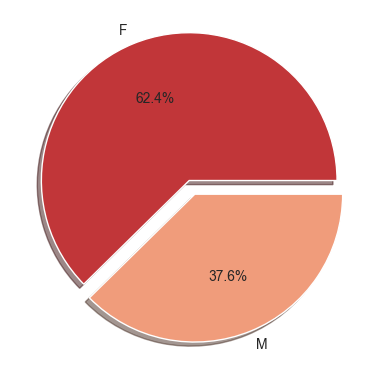

In [23]:
# visualized Gender column using pie plot function i create it in cell 15

pie_plot(column_name = "Gender", explodeIndex = 0)

🛑 Most customer is female

**Discovering Location column**


In [24]:
# see unique values

df["Location"].unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

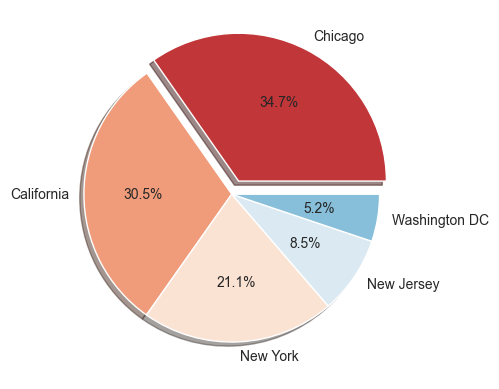

In [25]:
# visualized Location column using pie plot function i create it in cell 15

pie_plot(column_name = "Location", explodeIndex = 0)

🛑 Most customer from Chicago

**Discovering Tenure_Months column**


In [26]:
# see unique values

df["Tenure_Months"].unique()

array([12., 43., 33., 49., 46., 14., 25., 50., 39., 21., 30., 29., 26.,
       41., 24., 40., 28., 15., 18., 32., 23.,  7.,  4.,  8., 27., 13.,
       38., 22.,  6., 34., 42., 45.,  3., 16., 17., 20.,  9., 10., 19.,
        5., 37., 31., 44., 36., 48., 47.,  2., 35., 11.])

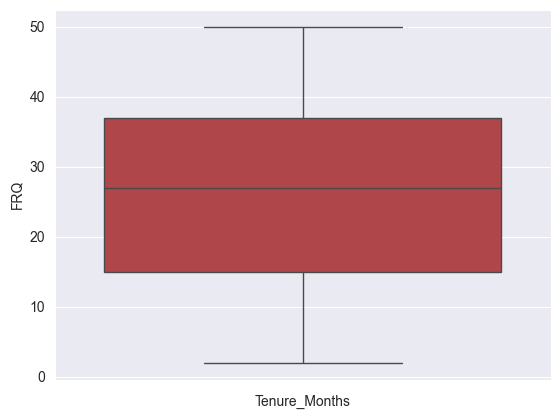

In [27]:
# see distribution

box_plot(y_axis = "Tenure_Months") # call function i create it in cell 16

AttributeError: Rectangle.set() got an unexpected keyword argument 'pallete'

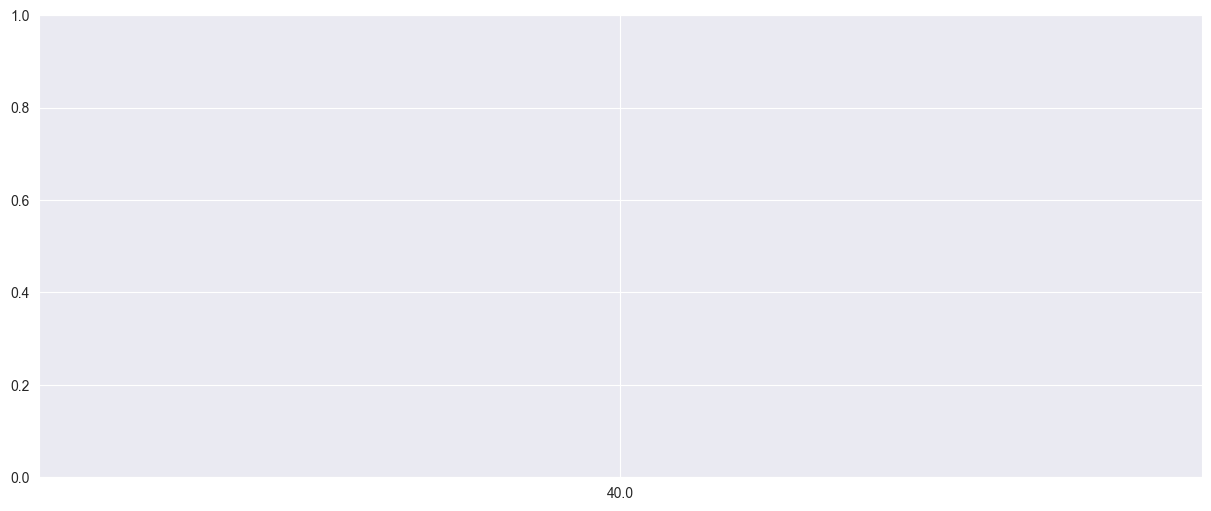

In [28]:
# visualized Tenure Months column using count plot function i create it in cell 14

# set figure size
plt.figure(figsize = (15,6))

# see top 20 mo
count_plot(x_axis = "Tenure_Months", top = 20) 